# Optical Character Recognitions

# - In this file we are importing our sample data as PDFs, color Images & Images. Images are in PNG format.
# - before we get into code we split the advertisement as train & test based on the variable information contain in text. if the variable contain  more than 5 it's consider as test advertisement.
# - initial we have done the train set after that we use test to the processing
# - Here We are doing the following orders for extract the text data from objects using pytesserect library.
1. Import libraries
2. Rename the Samples
3. convert PDF as PNG format
4. Resize and filter PDF converted images and color images
5. Extract the textual data from objects
6. Save in text file

# Import Libraries

In [1]:
import pytesseract 
import cv2
from pdf2image import convert_from_path
from PIL import Image 
import os
import numpy as np
import pandas as pd

# Rename all file for easy to process

# Rename PDF file

In [2]:
path_pdf = os.chdir(r"D:\R & D PROJECT\Samples\Samp_test\PDF_test")
i = 1
for image in os.listdir(path_pdf):
    new_name="PDF_test_samp_{}.pdf".format(i)
    os.rename(image,new_name)

    i +=1
print("Files Renamed")

Files Renamed


# Rename Color image

In [3]:
path_col_image = os.chdir(r"D:\R & D PROJECT\Samples\Samp_test\Col_test")
i = 1
for image in os.listdir(path_col_image):
    new_name="Col_test_image_{}.jpg".format(i)
    os.rename(image,new_name)

    i +=1
print('Name Changed')

Name Changed


# Renamed Normal Images

In [4]:
path_image = os.chdir(r"D:\R & D PROJECT\Samples\Samp_test\Nor_test")
i = 1
for image in os.listdir(path_image):
    new_name="Nor_test_image_{}.jpg".format(i)
    os.rename(image,new_name)

    i +=1
print('Name Changed')

Name Changed


# Convert PDF as image

In [4]:
image_counter = 1

PDF_file = os.chdir(r"D:\R & D PROJECT\Samples\Samp_test\PDF_test")
for item in os.listdir(PDF_file):

    pages = convert_from_path(item,400,poppler_path=r'C:\Users\uer\Downloads\Compressed\poppler-0.67.0\bin',)
    for page in pages:
        filename = r"D:\R & D PROJECT\Samples\Samp_test\PDF_conv_test\PDF_test_image_"+str(image_counter)+".jpg"
        page.save(filename,"JPEG")
        image_counter = image_counter + 1

print("Converted all files")

Converted all files


# Show all advertise images

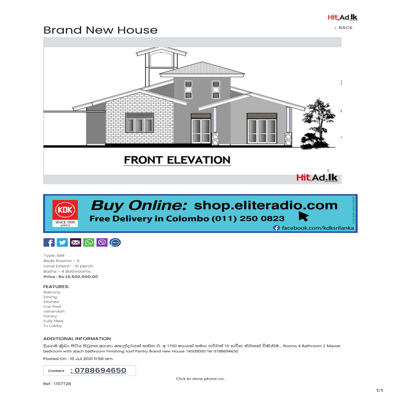

In [5]:
#Nor_img = Image.open(r"D:\R & D PROJECT\Samples\Samp_test\Nor_Test\Nor_test_image_2.jpg")
#Col_img = Image.open(r"D:\R & D PROJECT\Samples\Samp_test\Col_Train\Col_test_image_7.jpg")
PDF_conv_img = Image.open(r"D:\R & D PROJECT\Samples\Samp_test\PDF_conv_test\PDF_test_image_1.jpg")
#Nor=Nor_img.resize((400,400))
#Col=Col_img.resize((400,400))
PDF=PDF_conv_img.resize((400,400))
PDF

# Filter & Resize the PDF converted Images

- The reason for filter the images. there have house images and other unnecessary ad characters.
- Resize the images to remove the borders of PDF converted images

In [9]:
i = 1
path_image = os.chdir(r"D:\R & D PROJECT\Samples\Samp_test\PDF_conv_test")
for image in os.listdir(path_image):
    
    # Color filter
    img = cv2.imread(image)
    imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _,thresh = cv2.threshold(imgGray,240,255,cv2.THRESH_BINARY)
    
    # Image Resize
    scale_percent = 0.2
    weight = int(thresh.shape[1]*scale_percent)
    height = int(thresh.shape[0]*scale_percent)
    deminsion = (weight,height)

    # Crop top and bottom unwanted text deminsion
    imgResized = cv2.resize(thresh, deminsion, interpolation=cv2.INTER_AREA)
    imgCropped = imgResized[58:1300,0:936]


    cv2.imwrite(r"D:\R & D PROJECT\Samples\Samp_test\Test_img\PDF_Filter_test_Img_"+str(i)+".jpg",imgCropped)
    i += 1

print("Process is Done")

Process is Done


# Show image

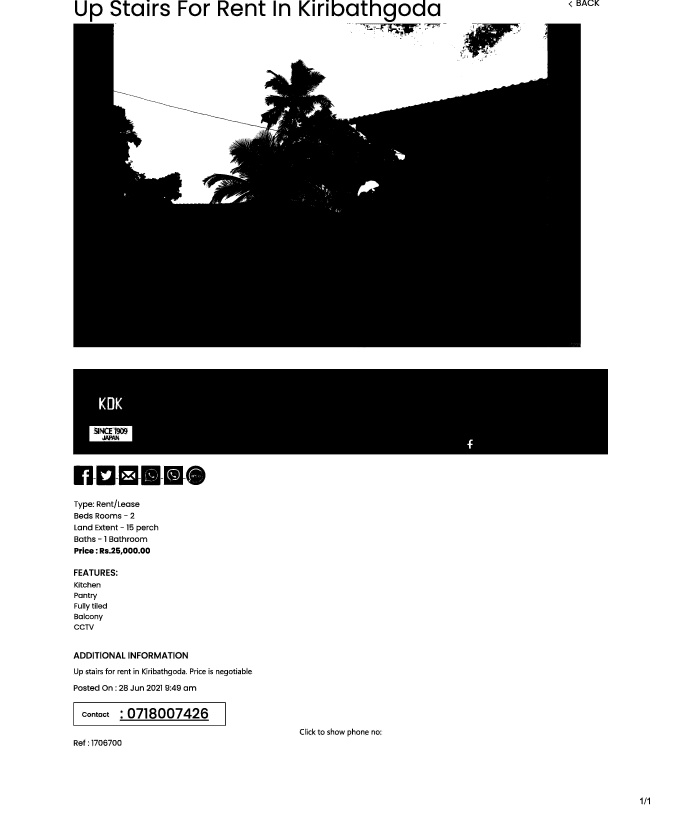

In [3]:
Filter_PDF = Image.open(r"D:\R & D PROJECT\Samples\Samp_train\PDF_filter_train_img\PDF_Filter_train_Img_35.jpg")
Filter_PDF

# Filter Color Images to hide the multi colors from images

In [10]:
i = 1
path_image = os.chdir(r"D:\R & D PROJECT\Samples\Samp_test\Col_test")
for image in os.listdir(path_image):

    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # covert to gray 
    result=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,81,4)

    cv2.imwrite(r"D:\R & D PROJECT\Samples\Samp_test\Test_img\col_filer_img_"+str(i)+".jpg",result)
    i += 1
    
print("Done")

Done


# Show image

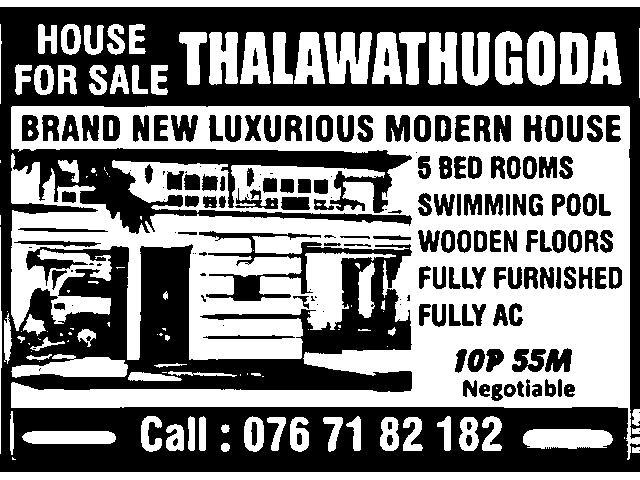

In [6]:
Col_img_flter = Image.open(r"D:\R & D PROJECT\Samples\Samp_train\Col_filter_train_img\col_filer_img_4.jpg")
Col_img_flter

# Rename the All images (PNG) files

In [11]:
path_image = os.chdir(r"D:\R & D PROJECT\Samples\Samp_test\Test_img")
i = 1
for image in os.listdir(path_image):
    new_name="test_img_samp_{}.jpg".format(i)
    os.rename(image,new_name)

    i +=1
print('Name Changed')

Name Changed


# Text Extractions from images & Save as text file

In [7]:
output_file = r"D:\R & D PROJECT\Test_text\test_Text_new.txt"
f = open(output_file, "a+")

path_image = os.chdir(r"D:\R & D PROJECT\Samples\Samp_test\Test_img")
count =len(os.listdir(path_image))


for i in range(1, count+1): 
   
    filename = r"D:\R & D PROJECT\Samples\Samp_test\Test_img\test_img_samp_"+str(i)+".jpg" 
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    text = str(((pytesseract.image_to_string(Image.open(filename))))) 
    f.write("new line\n")    
   
    f.write(text) 
f.close()
print("Texts are Extracted")

Texts are Extracted


In [8]:
with open(r"D:\R & D PROJECT\Test_text\test_Text_new.txt", "r") as filename:
    advertise_lines = filename.readlines()

In [9]:
advertise_lines[:5]

['new line\n',
 'TWO STOREY HOUSE FOR SALE - NEGONBO\n',
 '\n',
 'Two storey air conditioned house for sale\n',
 '\n']